# Cone Search
### Ken Smith
Simple cone search.  Given RA, Dec, radius and type of parameter we want do a cone search.  Plot lightcurves of all the objects we get.

Demonstrates usage of:
* /cone/
* /objects/

The query joins the objects, watchlists and areas table.

### Python (3 only) requirements - pip install
lasair

In [1]:
!pip install lasair


  Created wheel for lasair: filename=lasair-0.0.1-cp37-none-any.whl size=5400 sha256=e2157d7980b5931a9e43755501d009d2aad52d6abbb93ff6a3577d4fb04bff58
  Stored in directory: /root/.cache/pip/wheels/90/14/ca/ebc366bda99df15e2f2a285ad518e6f54e586f9e493a761c8a
Successfully built lasair


### Grab my Lasair API token
Get your token before you start.  If you haven't got a Lasair account you can register here: https://lasair-iris.roe.ac.uk/signup.  Use the curl command below to get your token & set the last line of the next cell to be your token ID. 

```bash
curl --data "username=tutorial&password=***********" https://lasair-iris.roe.ac.uk/api/auth-token/
```
You should get the following response:
```json
{"token":"acf14c2788ec5d7abb351f06e9ce2624a810b2ab"}
```
We can use this token temporarily, but note that it will be disabled after the workshop!

In [2]:
from astropy.time import Time
import matplotlib.pyplot as plt

from lasair import LasairError, lasair_client as lasair

token = "acf14c2788ec5d7abb351f06e9ce2624a810b2ab"

### Do the cone search
Get all, nearest or just count. Note that objects are returned in ascending order of separation.

In [3]:
ra=132.209445
dec=29.870510

# Huge search radius of 16.66 arcmins - the maximum!
radius = 1000.0

L = lasair(token)

try:
    result = L.cone(ra, dec, radius, requestType='count')
except LasairError as e:
    print(e)

print(result['count'])

try:
    result = L.cone(ra, dec, radius, requestType='nearest')
except LasairError as e:
    print(e)

print(result['object'], "%.2f" % result['separation'])
print()

requestType = 'all'

try:
    result = L.cone(ra, dec, radius, requestType='all')
except LasairError as e:
    print(e)

for obj in result:
    print(obj['object'], "%.2f" % obj['separation'])

11
ZTF21aapyiku 0.01

ZTF21aapyiku 0.01
ZTF18aaadcxy 148.53
ZTF17aacvvqb 148.98
ZTF19acyxnce 149.07
ZTF21aacrcxj 149.08
ZTF19aczjpso 149.38
ZTF18acexyml 149.74
ZTF20acpwyqm 171.03
ZTF21aafgnth 248.93
ZTF18acmrqfh 296.74
ZTF18aaaddej 642.02


### Grab the lightcurves using the objects API
(This is just optional!!)

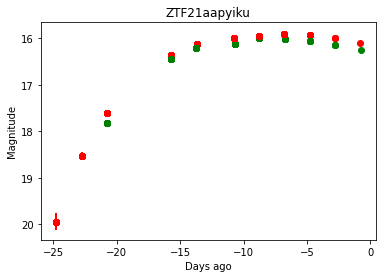

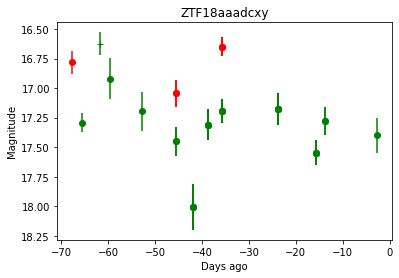

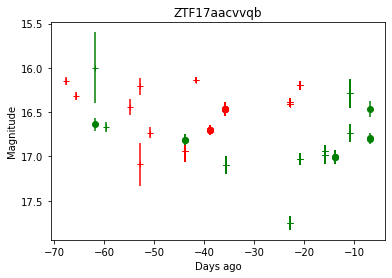

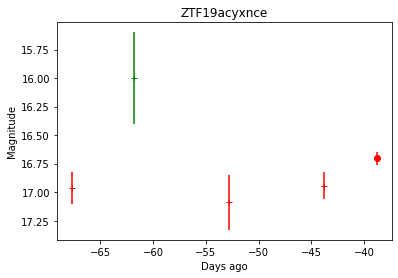

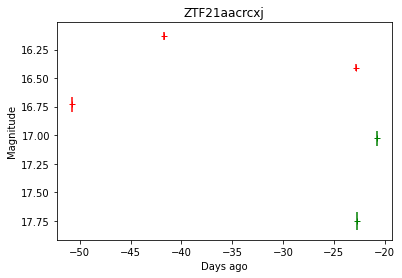

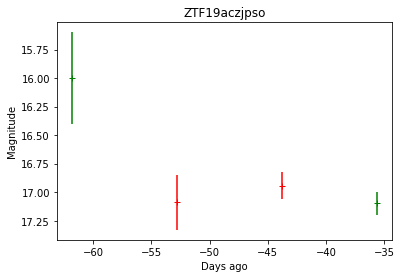

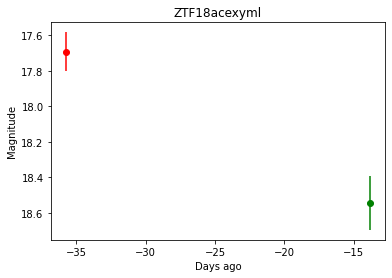

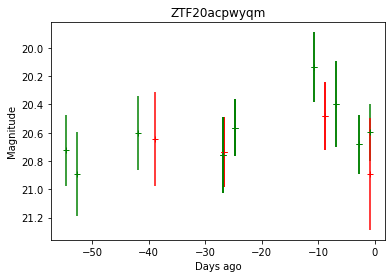

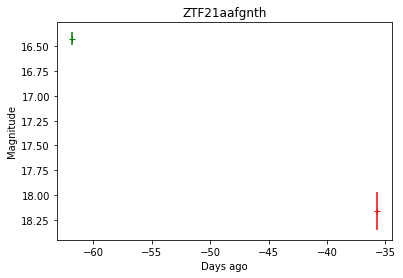

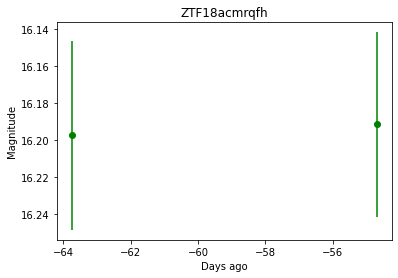

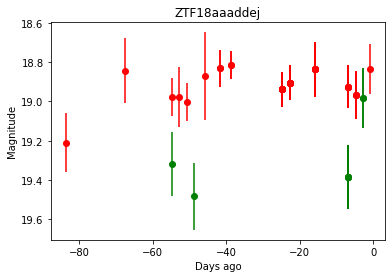

In [4]:
objectList = [row['object'] for row in result]
response = L.objects(objectList)

# create a dictionary of lightcurves

lcsDict = {}
for obj in response:    
    lcsDict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'g',2:'r'}

now = Time.now().jd

for obj in response:
    plt.figure()
    plt.subplot(111)
    for i in lcsDict[obj['objectId']]['candidates']:
        if 'isdiffpos' in i:
            if i['isdiffpos']=='t':
                plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='o',color=cols[i['fid']])
            else:
                plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='+',color=cols[i['fid']])


    plt.gca().invert_yaxis()
    plt.ylabel('Magnitude')
    plt.xlabel('Days ago')
    plt.title(obj['objectId'])


# Streams
### Ken Smith
Grab the list of streams that match a regular expression.  Interrogate a stream.

Demonstrates usage of:
* /streams/
* /streams/```topic```


### Python (3 only) requirements - pip install
lasair

### Grab my Lasair API token
Get your token before you start.  If you haven't got a Lasair account you can register here: https://lasair-iris.roe.ac.uk/signup.  Use the curl command below to get your token & set the last line of the next cell to be your token ID. 

```bash
curl --data "username=tutorial&password=***********" https://lasair-iris.roe.ac.uk/api/auth-token/
```
You should get the following response:
```json
{"token":"acf14c2788ec5d7abb351f06e9ce2624a810b2ab"}
```
We can use this token temporarily, but note that it will be disabled after the workshop!

In [5]:
from lasair import LasairError, lasair_client as lasair
import json

token = "acf14c2788ec5d7abb351f06e9ce2624a810b2ab"

### Get all the streams
Get all the available streams.

In [6]:
regex= '.*'

L = lasair(token)

try:
    result = L.streams_topics(regex)
except LasairError as e:
    print(e)

for row in result:
    print(row['topic'], row['more_info'])


2OrphanSearch https://lasair-iris.roe.ac.uk/query/1/
2SN-likecandidates https://lasair-iris.roe.ac.uk/query/2/
2AllnucleartransientsandTDEcandidates https://lasair-iris.roe.ac.uk/query/3/
2SherlockCVs https://lasair-iris.roe.ac.uk/query/4/
2RemoteCFroObject https://lasair-iris.roe.ac.uk/query/10/
2C-SNAILS https://lasair-iris.roe.ac.uk/query/15/
2MillioninSDSS https://lasair-iris.roe.ac.uk/query/38/
2Lightweight https://lasair-iris.roe.ac.uk/query/41/
2TDE-candidates-EA https://lasair-iris.roe.ac.uk/query/45/
2TNSsources https://lasair-iris.roe.ac.uk/query/60/
2Extragalactic https://lasair-iris.roe.ac.uk/query/64/
2Roys_TDE-candidates https://lasair-iris.roe.ac.uk/query/69/
2TNSsources https://lasair-iris.roe.ac.uk/query/71/


### Get info on a particular topic

In [7]:
topic = '2C-SNAILS'


#try:
#    result = L.streams(topic, limit=1)
#except LasairError as e:
#    print(e)

result = L.streams(topic, limit=1)


    
for row in result:
    print(json.dumps(row, indent=2))


{
  "objectId": "ZTF18abcwzhs",
  "g": 18.6754,
  "g_max": 18.5755,
  "g_host": 20.121,
  "r": 18.6762,
  "r_max": 18.4835,
  "r_host": 19.244,
  "ra": 283.7354828153846,
  "decl": 17.814568523076925,
  "disc_days": -625.1,
  "latest_days": -650.1,
  "classification": "NT",
  "UTC": "2021-04-12 12:33:57"
}


# Sherlock (Context Classification)
### Ken Smith
The Sherlock service gives the context of a list of objects in the sky based on numerous large catalogues (e.g. Pan-STARRS1, Gaia DR2, etc.).  The service can also accept an arbitrary position in the sky.

Demonstrates usage of:
* /streams/```topic```/
* /sherlock/objects/
* /sherlock/position/


### Python (3 only) requirements - pip install
lasair

### Grab my Lasair API token
Get your token before you start.  If you haven't got a Lasair account you can register here: https://lasair-iris.roe.ac.uk/signup.  Use the curl command below to get your token & set the last line of the next cell to be your token ID. 

```bash
curl --data "username=tutorial&password=***********" https://lasair-iris.roe.ac.uk/api/auth-token/
```
You should get the following response:
```json
{"token":"acf14c2788ec5d7abb351f06e9ce2624a810b2ab"}
```
We can use this token temporarily, but note that it will be disabled after the workshop!

In [8]:
from lasair import LasairError, lasair_client as lasair
import json

token = "acf14c2788ec5d7abb351f06e9ce2624a810b2ab"

### Get a bunch of objects
Why not just grab a few objects from one of the topics (e.g. the 2SN-likecandidates topic)

In [9]:
topic = "2SN-likecandidates"

L = lasair(token)

try:
    result = L.streams(topic, limit=10)
except LasairError as e:
    print(e)

objectIds = [row['objectId'] for row in result]



### Now get Sherlock info for these objects

In [10]:
try:
    result = L.sherlock_objects(objectIds, lite = True)
except LasairError as e:
    print(e)

for k, v in result['classifications'].items():
    print(k, json.dumps(v, indent=2))

for row in result['crossmatches']:
    print(json.dumps(row, indent=2))

print(len(result['crossmatches']))
    

ZTF18abcwzhs [
  "NT",
  "The transient is synonymous with <em><a href=\"http://skyserver.sdss.org/dr12/en/tools/explore/Summary.aspx?id=1237666226966825232\">SDSS J185456.52+174852.4</a></em>; a G=19.68 mag galaxy found in the SDSS/GAIA catalogues. It's located 0.1\" from the galaxy core."
]
ZTF18abmmfiy [
  "UNCLEAR",
  "The transient is possibly associated with <em>121823084912723376</em>; an r=22.44 mag uncertain found in the PS1 catalogue. It's located 0.20\" S, 0.09\" E from the uncertain centre."
]
ZTF18abqavrw [
  "NT",
  "The transient is synonymous with <em><a href=\"http://skyserver.sdss.org/dr12/en/tools/explore/Summary.aspx?id=1237666245744658297\">SDSS J202720.33+142919.4</a></em>; a V=15.13 mag galaxy found in the SDSS/GSC/2MASS/PS1/GAIA catalogues. It's located 0.2\" from the galaxy core."
]
ZTF18aceijsp [
  "NT",
  "The transient is synonymous with <em>19370820+6608213</em>; a B=16.95 mag stellar source found in the 2MASS/GAIA/GLADE catalogues. It's located 0.1\" from 

### Finally - Sherlock by Position
OK - let's try and grab Sherlock information for a star we KNOW can't be in ZTF.  What about alpha Crux.

In [11]:
# This is ACrux.
ra = 186.64956341666667
dec = -63.09909286111111

try:
    result = L.sherlock_position(ra, dec, lite = True)
except LasairError as e:
    print(e)

print(json.dumps(result, indent=2))

{
  "classifications": {
    "transient_00000": [
      "VS",
      "The transient is synonymous with <em>S7LH000444</em>; a V=1.28 mag stellar source found in the GSC catalogue. It's located 0.0\" from the stellar source core."
    ]
  },
  "crossmatches": [
    {
      "transient_object_id": "transient_00000",
      "association_type": "VS",
      "catalogue_table_name": "GSC",
      "catalogue_object_id": "S7LH000444",
      "catalogue_object_type": "star",
      "raDeg": 186.64956583949925,
      "decDeg": -63.09909166644884,
      "separationArcsec": 0.01,
      "northSeparationArcsec": "0.0048",
      "eastSeparationArcsec": "0.0046",
      "physical_separation_kpc": null,
      "direct_distance": null,
      "distance": null,
      "z": null,
      "photoZ": null,
      "photoZErr": null,
      "Mag": 1.28,
      "MagFilter": "V",
      "MagErr": 0.01,
      "classificationReliability": 1
    }
  ]
}
